In [9]:
# loading all the necessary libraries
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split  # Importing this to split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler to normalize features
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report  # Importing function to evaluate the classification performance
from imblearn.under_sampling import RandomUnderSampler  # Importing the undersampling technique to balance class distribution

# Loading dataset and performinmg EDA
df = pd.read_csv("CreditCard_Fraud_Detection.csv")  
# Loading the dataset into a pandas DataFrame from a CSV file
df


,Transaction ID,Cardholder ID,Transaction Amount,Merchant Type,Location,Time of Transaction,Is Fraud
0,TID000001,CH001,1878.96,Travel,Houston,2025-01-01 00:00:00,0
1,TID000002,CH002,4754.06,Travel,Los Angeles,2025-01-01 01:00:00,0
2,TID000003,CH003,3662.65,Electronics,Los Angeles,2025-01-01 02:00:00,0
3,TID000004,CH004,2997.31,Grocery,Los Angeles,2025-01-01 03:00:00,0
4,TID000005,CH005,788.53,Grocery,Chicago,2025-01-01 04:00:00,0
...,...,...,...,...,...,...,...
995,TID000996,CH096,466.99,Grocery,Phoenix,2025-02-11 11:00:00,0
996,TID000997,CH097,4587.39,Travel,Chicago,2025-02-11 12:00:00,1
997,TID000998,CH098,692.72,Travel,Chicago,2025-02-11 13:00:00,0
998,TID000999,CH099,4751.68,Retail,Phoenix,2025-02-11 14:00:00,0


In [3]:
# Viewing all the column names
print("\nColumn Names:\n", df.columns.tolist())  
# Printing all the column names in the dataset as a list


Column Names:
 ['Transaction ID', 'Cardholder ID', 'Transaction Amount', 'Merchant Type', 'Location', 'Time of Transaction', 'Is Fraud']


In [7]:
# Converting the  column names to consistent case and strip whitespaces for consistency
df.columns = df.columns.str.strip()  

# Checking if 'Is Fraud' column exists because it is teh target variable 
if 'Is Fraud' not in df.columns:  
    raise KeyError("Column 'Is Fraud' not found. Please check the dataset.")  

#printing the first five rows
print(df.head())  

  Transaction ID Cardholder ID  Transaction Amount Merchant Type     Location  \
0      TID000001         CH001             1878.96        Travel      Houston   
1      TID000002         CH002             4754.06        Travel  Los Angeles   
2      TID000003         CH003             3662.65   Electronics  Los Angeles   
3      TID000004         CH004             2997.31       Grocery  Los Angeles   
4      TID000005         CH005              788.53       Grocery      Chicago   

   Time of Transaction  Is Fraud  
0  2025-01-01 00:00:00         0  
1  2025-01-01 01:00:00         0  
2  2025-01-01 02:00:00         0  
3  2025-01-01 03:00:00         0  
4  2025-01-01 04:00:00         0  


In [10]:
#checking for missing values in the dataset
print("\nMissing Values:\n", df.isnull().sum())  



Missing Values:
 Transaction ID         0
Cardholder ID          0
Transaction Amount     0
Merchant Type          0
Location               0
Time of Transaction    0
Is Fraud               0
dtype: int64


In [11]:
#showing the number of fraud vs non-fraud cases to observe the class imbalance
print("\nClass Distribution:\n", df['Is Fraud'].value_counts())  


Class Distribution:
 Is Fraud
0    941
1     59
Name: count, dtype: int64


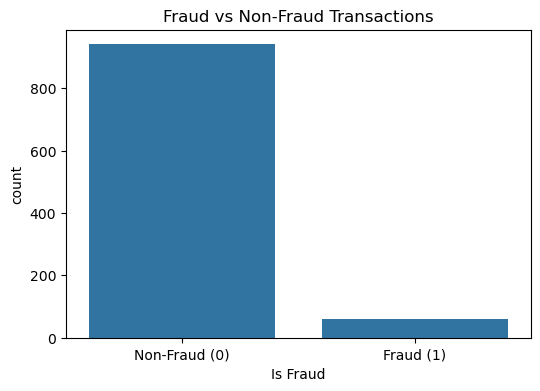

In [12]:
# Visualizing the class imbalance
plt.figure(figsize=(6, 4))  

# Creating a bar plot showing counts of fraud vs non-fraud transactions
sns.countplot(x='Is Fraud', data=df)  

plt.title("Fraud vs Non-Fraud Transactions")  

#customizing the x-axis tiock labels to get clarity
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])  

plt.show()  

# Feature selection and dropping the target variable and non-predictive 'Time of Transaction' column to create feature matrix
X = df.drop(['Is Fraud', 'Time of Transaction'], axis=1)  

# Encoding categorical variables using one-hot encoding, dropping the first category to avoid multicollinearity
X = pd.get_dummies(X, drop_first=True)  

y = df['Is Fraud']  # Setting the target variable

scaler = StandardScaler() #initializing the StandardScaler to standardize feature values

X_scaled = scaler.fit_transform(X)  #fitting the scaler to the features and transforming them to have mean 0 and standard deviation 1

# Addressing the  imbalance using RandomUnderSampler by initializing it to downsample the majority class 
rus = RandomUnderSampler(random_state=42)  

X_resampled, y_resampled = rus.fit_resample(X_scaled, y)  #applying undersampling to balance the class distribution in the dataset

# Splitting the data  into training and test sets
X_train, X_test, y_train, y_test = train_test_split(  
    X_resampled, y_resampled, test_size=0.3, random_state=42  #splitting the resampled data into training and testing sets 
    #(70% train, 30% test)
) 

In [2]:
# Interpretation
print("\nInterpretation:")
print("The clusters reveal distinct customer segments based on income and spending.")
print("Including:")
print("- High income, high spending: target with premium promotions")
print("- Low income, high spending: value-oriented offers")
print("- High income, low spending: incentives to increase spend")

print("\nBusiness Application:")
print("Retailers can use these segments to tailor campaigns, personalize communication, and allocate marketing resources more effectively for customers.")


Interpretation:
The clusters reveal distinct customer segments based on income and spending.
Including:
- High income, high spending: target with premium promotions
- Low income, high spending: value-oriented offers
- High income, low spending: incentives to increase spend

Business Application:
Retailers can use these segments to tailor campaigns, personalize communication, and allocate marketing resources more effectively for customers.


In [14]:
#Training the models and evaluating

# Initializing a Logistic Regression model
lr_model = LogisticRegression() 

# training (fitting) the logistic regression model on the training data
lr_model.fit(X_train, y_train)  

# Making predictions on the test data using the trained logistic regression model
y_pred_lr = lr_model.predict(X_test)  

#initializing a Random Forest Classifier with a fixed random seed for reproducibility
rf_model = RandomForestClassifier(random_state=42)  


# Training (fitting) the random forest model on the training data
rf_model.fit(X_train, y_train)  

# Making predictions on the test data using the trained random forest model
y_pred_rf = rf_model.predict(X_test)  

# Printing a heading for the Logistic Regression evaluation results
print("\nLogistic Regression Report:")  


# Displaying the  precision, recall, f1-score, and support for the logistic regression model's predictions
print(classification_report(y_test, y_pred_lr)) 
print("\nRandom Forest Classifier Report:")  

# Displaying precision, recall, f1-score, and support for the random forest model's predictions
print(classification_report(y_test, y_pred_rf))  



Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.60      0.15      0.24        20
           1       0.45      0.88      0.60        16

    accuracy                           0.47        36
   macro avg       0.53      0.51      0.42        36
weighted avg       0.53      0.47      0.40        36


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.52      0.55      0.54        20
           1       0.40      0.38      0.39        16

    accuracy                           0.47        36
   macro avg       0.46      0.46      0.46        36
weighted avg       0.47      0.47      0.47        36



In [15]:
# Ethical Considerations
print("\nEthical Considerations:")
print("1. False Positives: Legitimate transactions marked as fraud may inconvenience users, cause distress, or disrupt service.")
print("2. Transparency: Customers must be informed of decisions and have avenues for appeal or explanation.")
print("3. Fairness: The model should be monitored for any bias based on age, gender, geography, etc.")
print("4. Privacy: Ensure transaction and user data is protected, encrypted, and used ethically.")
print("5. Continuous Monitoring: Fraud tactics evolve, so models must be retrained and re-evaluated regularly.")



Ethical Considerations:
1. False Positives: Legitimate transactions marked as fraud may inconvenience users, cause distress, or disrupt service.
2. Transparency: Customers must be informed of decisions and have avenues for appeal or explanation.
3. Fairness: The model should be monitored for any bias based on age, gender, geography, etc.
4. Privacy: Ensure transaction and user data is protected, encrypted, and used ethically.
5. Continuous Monitoring: Fraud tactics evolve, so models must be retrained and re-evaluated regularly.
